In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import zipfile

with zipfile.ZipFile("archive (6).zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [6]:
import os

os.listdir("data")


['credits.csv', 'titles.csv']

In [7]:
import glob
import pandas as pd

files = glob.glob("data/*.csv")
print(files)   # MUST show file names

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
df.head()


['data/credits.csv', 'data/titles.csv']


,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748.0,tm84618,Robert De Niro,Travis Bickle,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14658.0,tm84618,Jodie Foster,Iris Steensma,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7064.0,tm84618,Albert Brooks,Tom,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3739.0,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48933.0,tm84618,Cybill Shepherd,Betsy,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
files = glob.glob("data/**/*.csv", recursive=True)
print(files)

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)


['data/credits.csv', 'data/titles.csv']


In [9]:
if len(files) == 0:
    print("❌ No CSV files found. Check folder path.")
else:
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    print("✅ Files loaded successfully")
    df.head()


✅ Files loaded successfully


In [10]:
import zipfile

zip_path = "/content/archive (6).zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ZIP extracted successfully")


✅ ZIP extracted successfully


In [11]:
import os

os.listdir("/content/data")


['credits.csv', 'titles.csv']

In [12]:
import glob

files = glob.glob("/content/data/**/*.csv", recursive=True)
print(files)


['/content/data/credits.csv', '/content/data/titles.csv']


In [13]:
import pandas as pd

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df.head()


,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748.0,tm84618,Robert De Niro,Travis Bickle,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14658.0,tm84618,Jodie Foster,Iris Steensma,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7064.0,tm84618,Albert Brooks,Tom,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3739.0,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48933.0,tm84618,Cybill Shepherd,Betsy,ACTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape
df.columns



Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
titles = pd.read_csv("/content/data/titles.csv")

titles = titles[['title', 'genres', 'runtime', 'imdb_score']]
titles.dropna(inplace=True)

titles.head()


,title,genres,runtime,imdb_score
1,Taxi Driver,"['drama', 'crime']",114,8.2
2,Deliverance,"['drama', 'action', 'thriller', 'european']",109,7.7
3,Monty Python and the Holy Grail,"['fantasy', 'action', 'comedy']",91,8.2
4,The Dirty Dozen,"['war', 'action']",150,7.7
5,Monty Python's Flying Circus,"['comedy', 'european']",30,8.8


In [17]:
titles['genre'] = (
    titles['genres']
    .str.replace("[\\[\\]']", "", regex=True)
    .str.split(",")
    .str[0]
)

titles.drop(columns=['genres'], inplace=True)
titles.head()


,title,runtime,imdb_score,genre
1,Taxi Driver,114,8.2,drama
2,Deliverance,109,7.7,drama
3,Monty Python and the Holy Grail,91,8.2,fantasy
4,The Dirty Dozen,150,7.7,war
5,Monty Python's Flying Circus,30,8.8,comedy


In [19]:
np.random.seed(42)

users = [f"U{str(i).zfill(3)}" for i in range(1, 101)]

viewing_data = titles.sample(1200, replace=True)

viewing_data['user_id'] = np.random.choice(users, size=len(viewing_data))


In [20]:
viewing_data['watch_hours'] = np.random.uniform(0.5, 6, size=len(viewing_data)).round(2)
viewing_data.head()


,title,runtime,imdb_score,genre,user_id,watch_hours
907,Who Am I,105,7.5,thriller,U005,4.47
5677,Surviving Paradise: A Family Tale,78,7.5,documentation,U037,1.28
5638,Father Christmas Is Back,104,4.5,comedy,U038,1.67
4029,The Millions,94,5.4,comedy,U094,5.00
3259,Crip Camp: A Disability Revolution,107,7.7,documentation,U009,2.27


In [21]:
viewing_data['rating'] = np.random.randint(1, 6, size=len(viewing_data))
viewing_data.head()


,title,runtime,imdb_score,genre,user_id,watch_hours,rating
907,Who Am I,105,7.5,thriller,U005,4.47,5
5677,Surviving Paradise: A Family Tale,78,7.5,documentation,U037,1.28,5
5638,Father Christmas Is Back,104,4.5,comedy,U038,1.67,4
4029,The Millions,94,5.4,comedy,U094,5.00,2
3259,Crip Camp: A Disability Revolution,107,7.7,documentation,U009,2.27,4


In [22]:
viewing_data.info()
viewing_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 907 to 1635
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1200 non-null   object 
 1   runtime      1200 non-null   int64  
 2   imdb_score   1200 non-null   float64
 3   genre        1200 non-null   object 
 4   user_id      1200 non-null   object 
 5   watch_hours  1200 non-null   float64
 6   rating       1200 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 75.0+ KB


,title,runtime,imdb_score,genre,user_id,watch_hours,rating
907,Who Am I,105,7.5,thriller,U005,4.47,5
5677,Surviving Paradise: A Family Tale,78,7.5,documentation,U037,1.28,5
5638,Father Christmas Is Back,104,4.5,comedy,U038,1.67,4
4029,The Millions,94,5.4,comedy,U094,5.00,2
3259,Crip Camp: A Disability Revolution,107,7.7,documentation,U009,2.27,4


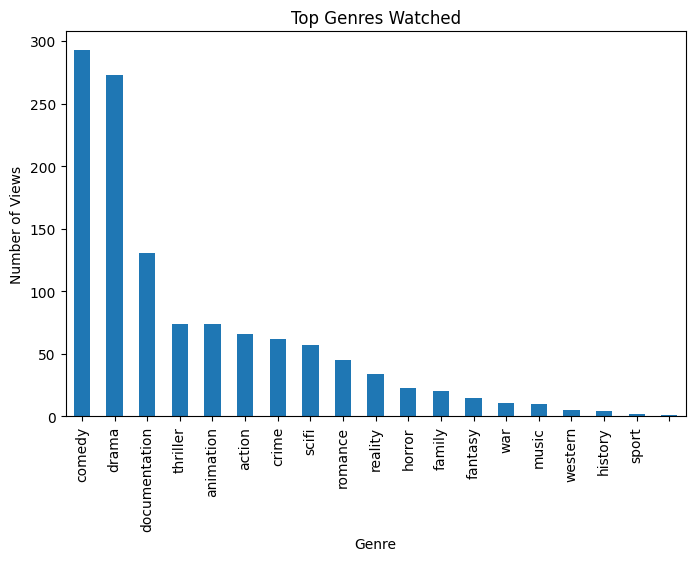

In [23]:
plt.figure(figsize=(8,5))
viewing_data['genre'].value_counts().plot(kind='bar')
plt.title("Top Genres Watched")
plt.xlabel("Genre")
plt.ylabel("Number of Views")
plt.show()


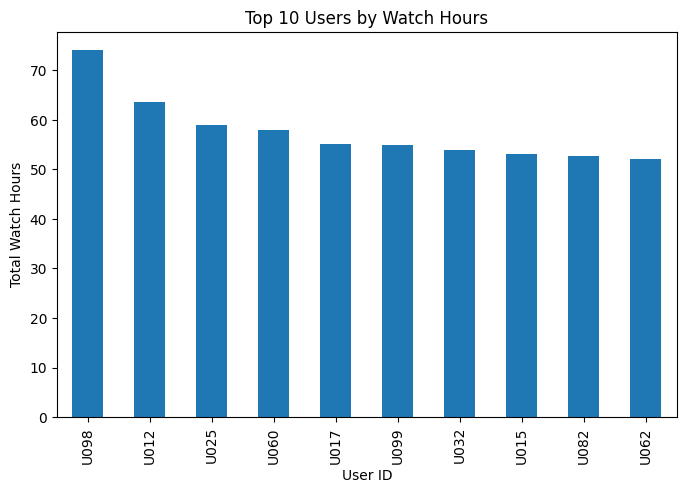

In [24]:
top_users = viewing_data.groupby('user_id')['watch_hours'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_users.plot(kind='bar')
plt.title("Top 10 Users by Watch Hours")
plt.xlabel("User ID")
plt.ylabel("Total Watch Hours")
plt.show()


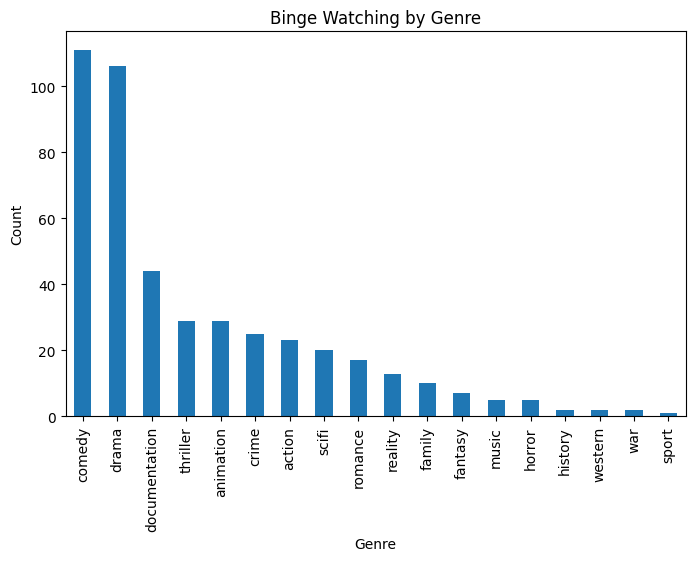

In [25]:
binge = viewing_data[viewing_data['watch_hours'] > 4]

plt.figure(figsize=(8,5))
binge['genre'].value_counts().plot(kind='bar')
plt.title("Binge Watching by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


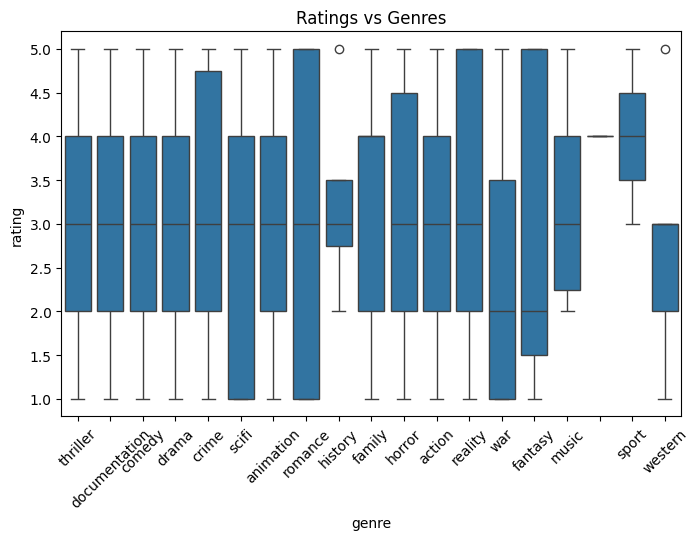

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='genre', y='rating', data=viewing_data)
plt.xticks(rotation=45)
plt.title("Ratings vs Genres")
plt.show()
